In [1]:
from omegaqe.modecoupling import Modecoupling
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import time

plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
mode = Modecoupling()
ells1 = np.arange(1, 10000, 1)
ells2 = ells1
t0 = time.time()
M = mode.components(ells1, ells2, Nchi=100)
t1 = time.time()

total = t1-t0
print(total)

24.82928776741028


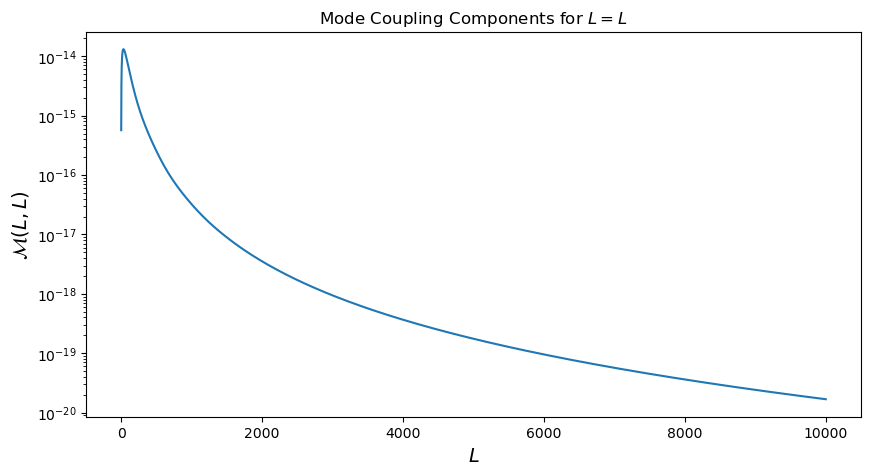

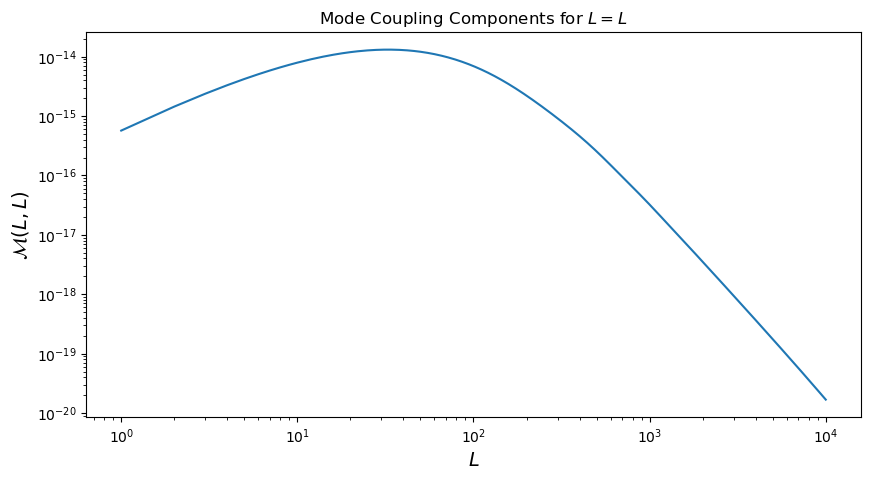

In [3]:
plt.figure()
plt.semilogy(ells1, M)
plt.title("Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}(L,L)$", fontsize=14)

plt.figure()
plt.loglog(ells1, M)
plt.title("Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}(L,L)$", fontsize=14)

plt.show()

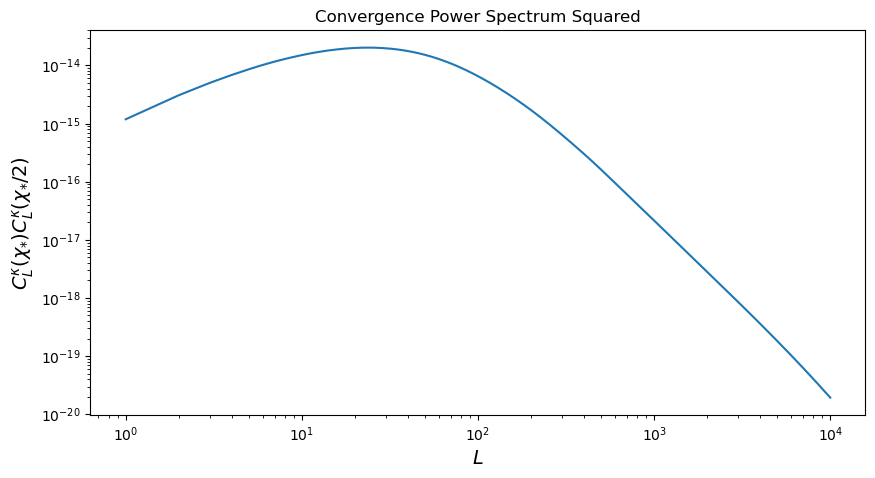

In [4]:
from omegaqe.powerspectra import Powerspectra
power = Powerspectra()
cosmo = power.cosmo
ells = np.arange(1, 10000, 1)
Chi_str = cosmo.get_chi_star()
Cl_kappa1 = power.get_kappa_ps_2source(ells, Chi_str, Chi_str)
Cl_kappa2 = power.get_kappa_ps_2source(ells, Chi_str/2, Chi_str/2)

plt.figure()
plt.loglog(ells, Cl_kappa1*Cl_kappa2, label="2source")
plt.title("Convergence Power Spectrum Squared")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$C_L^{\kappa}(\chi _{*})C_L^{\kappa}(\chi _{*}/2)$", fontsize=14)
plt.show()

In [5]:
Nell_samples = 100
ells_sample_1000 = np.linspace(1,1000,Nell_samples)
ells_sample_10000 = mode.generate_sample_ells(ellmax=10000, Nells=Nell_samples)

M_spline1000 = mode.spline(ells_sample_1000)

t0 = time.time()
M_spline10000 = mode.spline(ells_sample_10000)
t1 = time.time()

Nell_samples_time = t1-t0
print(Nell_samples_time)

27.12856698036194


In [6]:
ellmax_plot = 1000
ells = np.arange(1, ellmax_plot + 1)
M_matrix1000 = M_spline1000(ells, ells)
M_matrix10000 = M_spline10000(ells, ells)

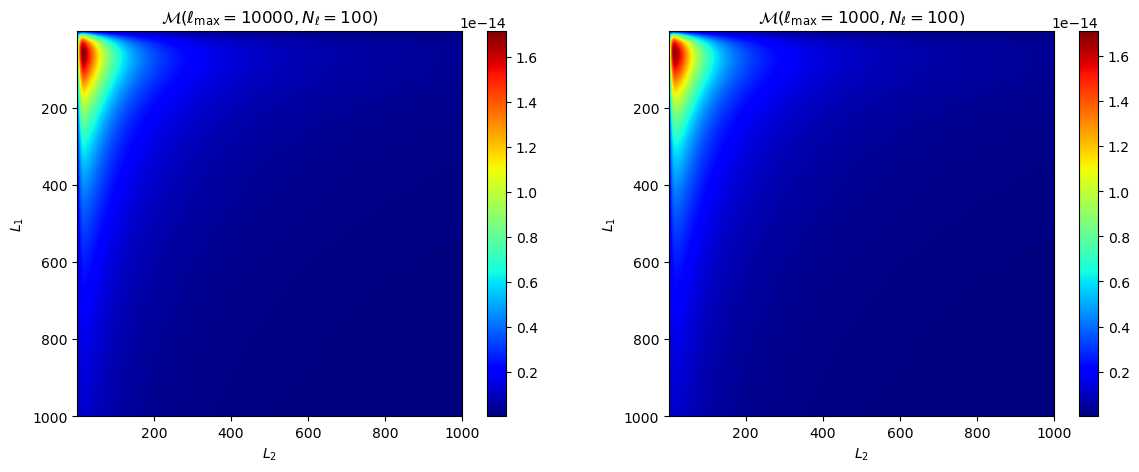

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
im0 = ax[0].imshow(M_matrix10000, cmap="jet", extent=[1,ellmax_plot,ellmax_plot,1])
ax[0].set_xlabel("$L_2$")
ax[0].set_ylabel("$L_1$")
ax[0].set_title("$\mathcal{M}(\ell_{\mathrm{max}}=10000, N_{\ell}=100)$")
plt.colorbar(im0, ax=ax[0])

im1 = ax[1].imshow(M_matrix1000, cmap="jet", extent=[1,ellmax_plot,ellmax_plot,1])
ax[1].set_xlabel("$L_2$")
ax[1].set_ylabel("$L_1$")
ax[1].set_title("$\mathcal{M}(\ell_{\mathrm{max}}=1000, N_{\ell}=100)$")
plt.colorbar(im1, ax=ax[1])
plt.show()

In [8]:
def diff_test(spline, N=1000, ellmin=1, ellmax=1000):
    diffs = np.ones(N)
    for iii in range(N):
        ell1 = random.randint(1, 1000)
        ell2 = random.randint(1, 1000)
        spline_comp = spline(ell1, ell2)[0][0]
        true_comp = mode.components(ell1, ell2)[0]
        diffs[iii] = np.abs(spline_comp - true_comp)/true_comp
    print(f"Deviation: mean = {np.mean(diffs) * 100:.4f}%, median = {np.median(diffs) * 100:.6f}%, std = {np.std(diffs) * 100:.2f}%")


In [9]:
print(f"Nell_samples = {Nell_samples}, time to build spline = {Nell_samples_time:.2f}s")
diff_test(M_spline10000, N=1000, ellmin=1, ellmax=1000)
diff_test(M_spline10000, N=1000, ellmin=1, ellmax=10000)
diff_test(M_spline10000, N=1000, ellmin=9000, ellmax=10000)

Nell_samples = 100, time to build spline = 27.13s
Deviation: mean = 0.0973%, median = 0.000093%, std = 0.97%
Deviation: mean = 0.1081%, median = 0.000085%, std = 1.02%
Deviation: mean = 0.1201%, median = 0.000083%, std = 1.07%


In [10]:
Nell_samples_2 = 200
ells_sample_10000_2 = mode.generate_sample_ells(ellmax=10000, Nells=Nell_samples_2)

t0 = time.time()
M_spline10000_2 = mode.spline(ells_sample_10000_2)
t1 = time.time()

Nell_samples_time_2 = t1 - t0

In [11]:
print(f"Nell_samples = {Nell_samples_2}, time to build spline = {Nell_samples_time_2:.2f}s")
diff_test(M_spline10000_2, N=1000, ellmin=1, ellmax=1000)
diff_test(M_spline10000_2, N=1000, ellmin=1, ellmax=10000)
diff_test(M_spline10000_2, N=1000, ellmin=9000, ellmax=10000)

Nell_samples = 200, time to build spline = 84.08s
Deviation: mean = 0.0572%, median = 0.000007%, std = 0.53%
Deviation: mean = 0.0201%, median = 0.000007%, std = 0.27%
Deviation: mean = 0.0248%, median = 0.000007%, std = 0.32%


In [12]:
def Chi2_test(spline, N=1000, ellmin=1, ellmax=1000):
    N = 1000
    spline_comps = np.ones(N)
    true_comps = np.ones(N)
    for iii in range(N):
        ell1 = random.randint(1, 10000)
        ell2 = random.randint(1, 10000)
        spline_comps[iii] = M_spline10000(ell1, ell2)[0][0]
        true_comps[iii] = mode.components(ell1, ell2)[0]

    Chi2 = np.sum((spline_comps - true_comps)**2)/np.var(spline_comps - true_comps)
    print(f"Reduced Chi square = {Chi2/N:.6f}")

In [13]:
print(f"Nell_samples = {Nell_samples}, time to build spline = {Nell_samples_time:.2f}s")
Chi2_test(M_spline10000, N=1000, ellmin=1, ellmax=1000)
Chi2_test(M_spline10000, N=1000, ellmin=1, ellmax=10000)
Chi2_test(M_spline10000, N=1000, ellmin=9000, ellmax=10000)

Nell_samples = 100, time to build spline = 27.13s
Reduced Chi square = 1.001640
Reduced Chi square = 1.002776
Reduced Chi square = 1.000823


In [14]:
print(f"Nell_samples = {Nell_samples_2}, time to build spline = {Nell_samples_time_2:.2f}s")
Chi2_test(M_spline10000_2, N=1000, ellmin=1, ellmax=1000)
Chi2_test(M_spline10000_2, N=1000, ellmin=1, ellmax=10000)
Chi2_test(M_spline10000_2, N=1000, ellmin=9000, ellmax=10000)

Nell_samples = 200, time to build spline = 84.08s
Reduced Chi square = 1.000698
Reduced Chi square = 1.000712
Reduced Chi square = 1.001363


In [15]:
from omegaqe.bispectra import Bispectra
bi = Bispectra()

In [16]:
ells3 = ells1
t0 = time.time()
conv_bi_equi = bi.get_bispectrum("kkk", ells1, ells2, ells3, M_spline=True)
t1 = time.time()

total = t1-t0
print(total)

29.73447012901306


In [17]:
t0 = time.time()
conv_bi_folded = bi.get_bispectrum("kkk", ells1, ells2/2, ells3/2, M_spline=True)
t1 = time.time()

total = t1-t0
print(total)

0.009094953536987305


In [18]:
ells_100 = np.ones(np.size(ells1))*100
conv_bi_100 = bi.get_bispectrum("kkk", ells_100, ells2, ells3, M_spline=True)

In [19]:
conv_bi_100_plus100 = bi.get_bispectrum("kkk", ells_100, ells2, ells3 + 100, M_spline=True)

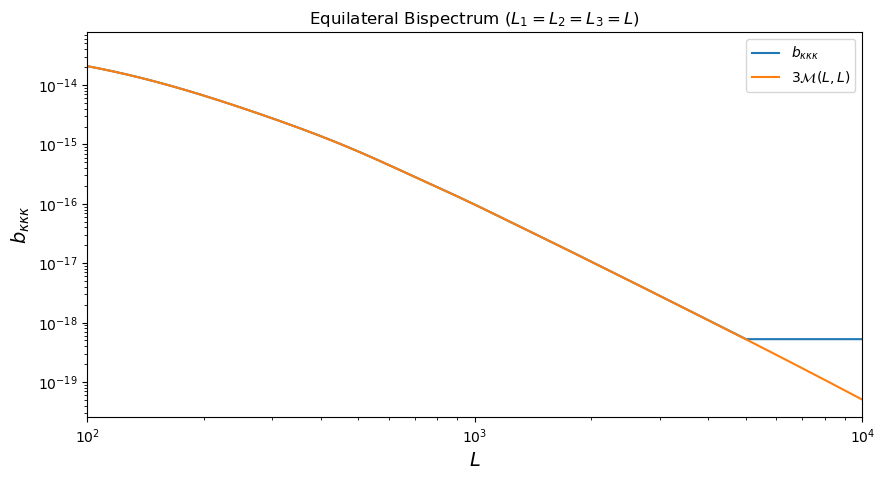

In [20]:
plt.figure()
plt.loglog(ells1, conv_bi_equi, label="$b_{\kappa\kappa\kappa}$")
plt.loglog(ells1, 3*M, label="$3\mathcal{M}(L,L)$")
plt.title("Equilateral Bispectrum ($L_1=L_2=L_3=L$)")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$b_{\kappa\kappa\kappa}$", fontsize=14)
plt.xlim(1e2, 1e4)
plt.legend()
plt.show()

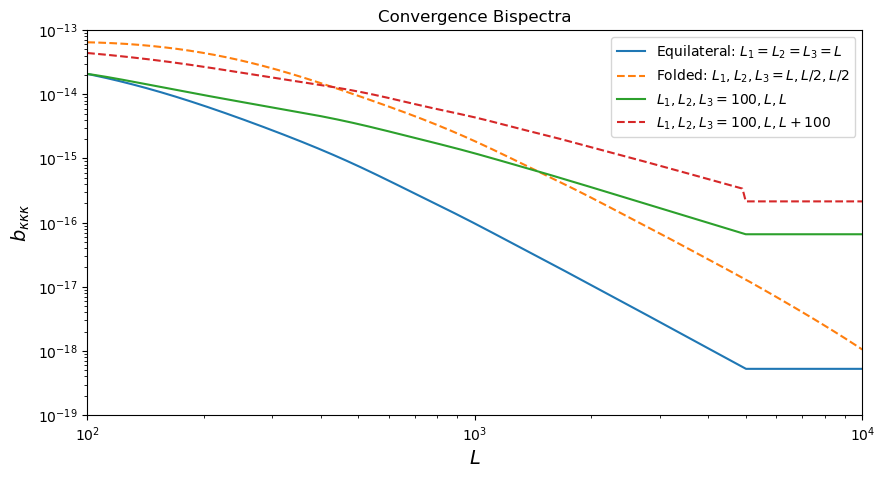

In [21]:
plt.figure()
plt.loglog(ells1, conv_bi_equi, label="Equilateral: $L_1=L_2=L_3=L$")
plt.loglog(ells1, np.abs(conv_bi_folded), label="Folded: $L_1,L_2,L_3=L,L/2,L/2$", linestyle="--")
plt.loglog(ells1, conv_bi_100, label="$L_1,L_2,L_3=100,L,L$")
plt.loglog(ells1, np.abs(conv_bi_100_plus100), label="$L_1,L_2,L_3=100,L,L+100$", linestyle="--")
plt.title("Convergence Bispectra")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$b_{\kappa\kappa\kappa}$", fontsize=14)
plt.xlim(1e2, 1e4)
plt.ylim(1e-19, 1e-13)
plt.legend()
plt.show()

In [22]:
def get_L3s(L1, L2, steps):
    Lmin = np.floor(np.abs(L1 - L2)) + 1
    Lmax = np.ceil(L1 + L2)
    L3s = np.arange(Lmin, Lmax, steps, dtype=int)
    Lmid = L1//2
    Lrange = Lmid - L3s[0]
    return L3s[np.where(L3s <= Lmid + Lrange)]

def get_bi_slice(L1, steps, typ):
    bi_slice = np.empty((L1 + 1, L1 + 1))
    bi_slice[:] = np.nan
    L2s = np.arange(L1//2, L1 + 1, steps, dtype=int)
    for L2 in L2s:
        L3s = get_L3s(L1, L2, steps)
        if typ == "rot":
            bi_slice[L2, L3s] = bi.get_bispectrum("kkw", L1, L2, L3s, M_spline=True)
        if typ == "conv":
            bi_slice[L2, L3s] = bi.get_bispectrum("kkk", L1, L2, L3s, M_spline=True)
    return bi_slice


In [23]:
plt.rcParams['figure.figsize'] = [10,4]
def slice_plot(L1, steps, bispectrum = "rot", interpolation="nearest"):
    bi_slice = get_bi_slice(L1, steps, typ=bispectrum)
    masked_slice = np.ma.array(bi_slice, mask=np.isnan(bi_slice))
    plt.figure()
    cmap = matplotlib.cm.jet
    cmap = matplotlib.cm.get_cmap("jet").copy()
    cmap.set_bad('white',1.)
    plt.imshow(masked_slice[L1//2:, :], interpolation=interpolation, cmap=cmap, origin='lower', extent=[0, L1, L1//2, L1])
    plt.colorbar()

    x = np.arange(0,L1 + 1, steps)
    y = np.concatenate((np.arange(L1, L1//2, -steps), np.arange(L1//2, L1 + 1, steps)))
    plt.plot(x,y, linewidth=5, color='k')
    plt.xlabel("$L_3$")
    plt.ylabel("$L_2$")
    if bispectrum == "rot":
        plt.title(f"$b^{{\kappa\kappa\omega}}_{{L_1L_2L_3}}$ for L1 = {L1}")
    elif bispectrum == "conv":
        plt.title(f"$b^{{\kappa\kappa\kappa}}_{{L_1L_2L_3}}$ for L1 = {L1}")


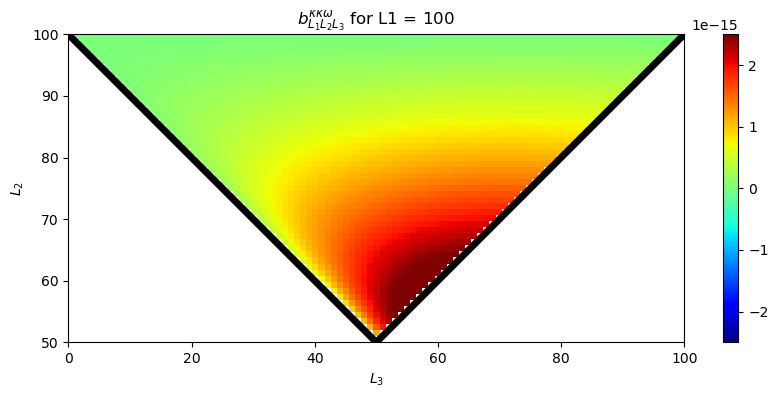

In [24]:
L1 = 100
slice_plot(L1, steps=1, bispectrum="rot")
plt.clim(-2.5e-15, 2.5e-15)
plt.show()

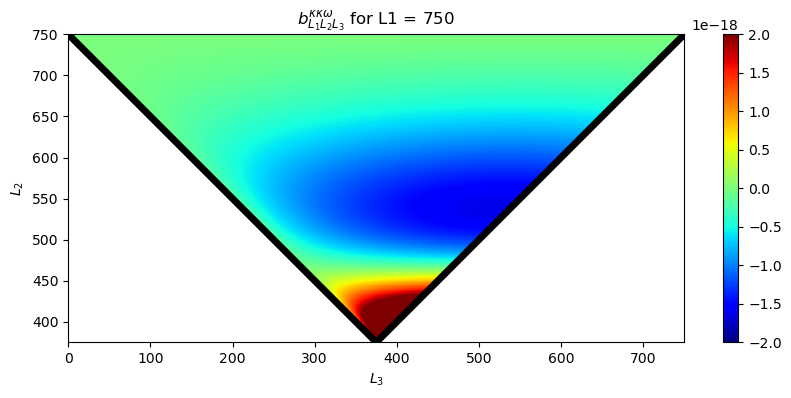

In [25]:
L1 = 750
slice_plot(L1, steps=1, bispectrum="rot")
plt.clim(-2e-18, 2e-18)
plt.show()

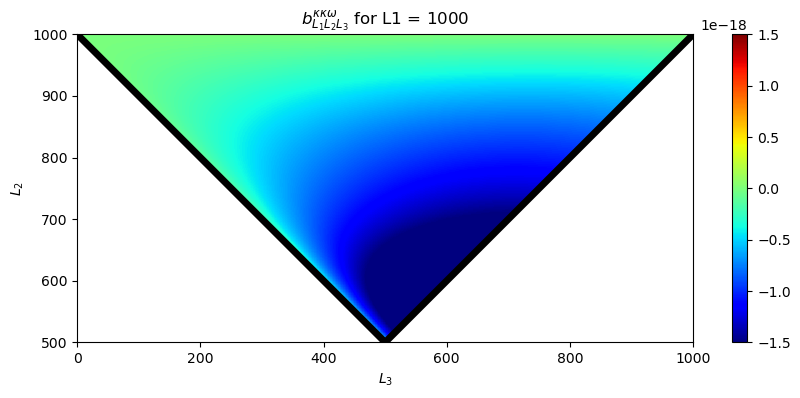

In [26]:
L1 = 1000
slice_plot(L1, steps=1, bispectrum="rot")
plt.clim(-1.5e-18, 1.5e-18)
plt.show()

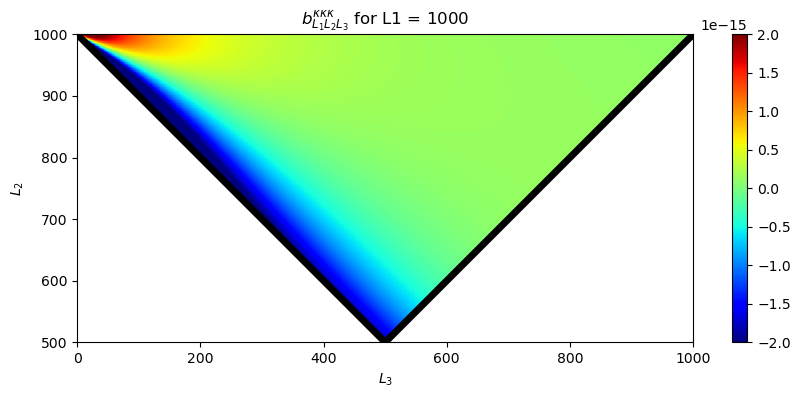

In [27]:
L1 = 1000
slice_plot(L1, steps=1, bispectrum="conv")
plt.clim(-2e-15, 2e-15)
plt.show()